# Day 2 — Dataset Understanding & EDA

Goal:
- Understand transaction behavior
- Identify data quality issues
- Derive feature engineering ideas

Important:
- Fraud labels are NOT used for modeling
- `is_fraud` is inspected only for evaluation insight

In [15]:
from pathlib import Path
import pandas as pd

BASE_DIR = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
DATA_PATH = BASE_DIR / "data" / "creditcard.csv"

df = pd.read_csv(
    DATA_PATH,
    parse_dates=["trans_date_trans_time"],
    low_memory=False
)


In [16]:
df.shape
df.info()
df.isna().mean().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

merch_zipcode            0.151135
trans_date_trans_time    0.000000
is_fraud                 0.000000
merch_long               0.000000
merch_lat                0.000000
unix_time                0.000000
trans_num                0.000000
dob                      0.000000
job                      0.000000
city_pop                 0.000000
long                     0.000000
lat                      0.000000
Unnamed: 0               0.000000
state                    0.000000
city                     0.000000
street                   0.000000
gender                   0.000000
last                     0.000000
first                    0.000000
amt                      0.000000
category                 0.000000
merchant                 0.000000
cc_num                   0.000000
zip                      0.000000
dtype: float64

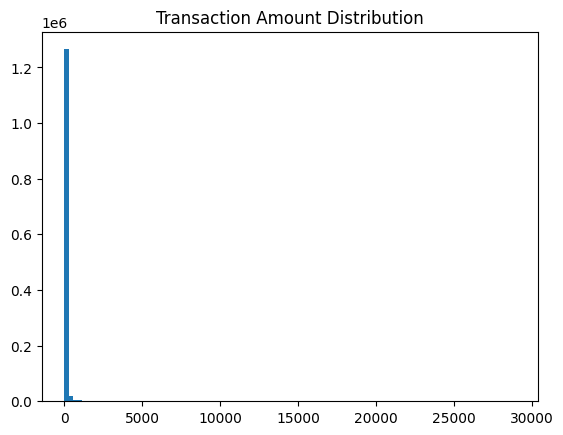

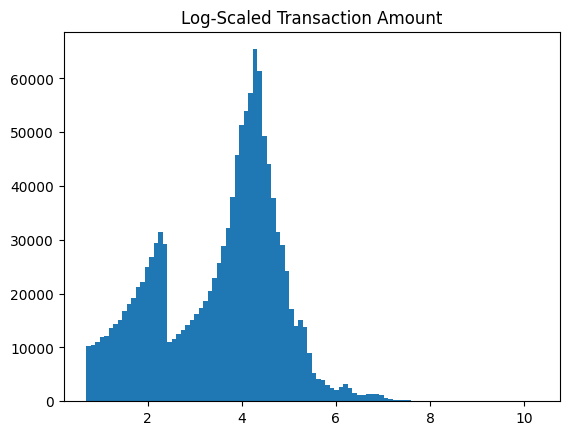

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df["amt"], bins=100)
plt.title("Transaction Amount Distribution")
plt.show()

plt.hist(np.log1p(df["amt"]), bins=100)
plt.title("Log-Scaled Transaction Amount")
plt.show()


<Axes: title={'center': 'Transactions per Day'}, xlabel='trans_date_trans_time'>

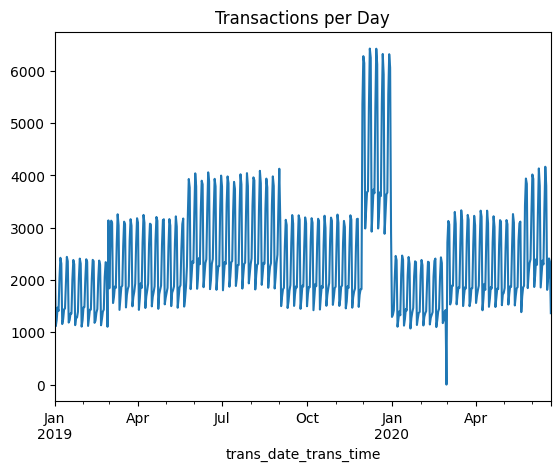

In [18]:
df.set_index("trans_date_trans_time") \
  .resample("D")["amt"] \
  .count() \
  .plot(title="Transactions per Day")


<Axes: xlabel='hour'>

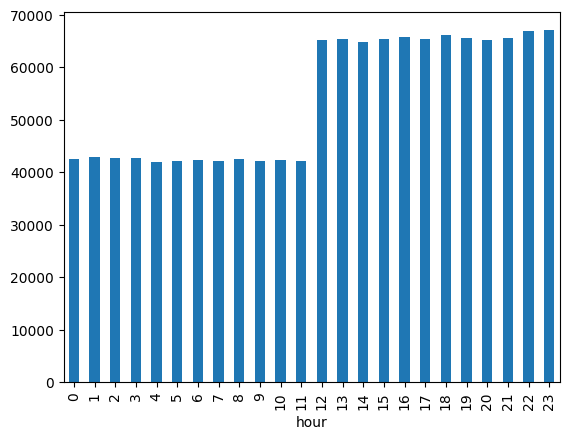

In [19]:
df["hour"] = df["trans_date_trans_time"].dt.hour
df["hour"].value_counts().sort_index().plot(kind="bar")


In [20]:
df["is_fraud"].value_counts(normalize=True)


is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64

In [21]:
df.groupby("is_fraud")["amt"].describe()


,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289169.0,67.667110,154.007971,1.00,9.6100,47.280,82.540,28948.90
1,7506.0,531.320092,390.560070,1.06,245.6625,396.505,900.875,1376.04


In [22]:
tx_per_card = df.groupby("cc_num").size()

tx_per_card.describe()


count     983.000000
mean     1319.099695
std       812.235900
min         7.000000
25%       525.000000
50%      1054.000000
75%      2025.000000
max      3123.000000
dtype: float64

<Axes: >

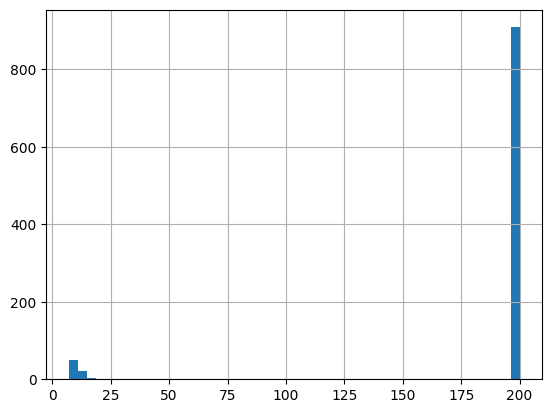

In [23]:
tx_per_card.clip(upper=200).hist(bins=50)


## Feature Engineering Ideas (from EDA)

- Log-scaled transaction amount
- Time since previous transaction per card
- Rolling mean & std of amount per card
- Transaction count per card (rolling window)
- Hour-of-day encoding
- Merchant/category novelty per card
- Geographical distance between customer and merchant
